<a href="https://colab.research.google.com/github/Adh101/TechAxis-Data-Science-with-Python-Notes/blob/main/Day3ofML_LogisticRegression_and_ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

telecom_churn_csv=pd.read_csv('/content/drive/MyDrive/telecom_churn_clean.csv')

telecom_churn_csv.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
X= telecom_churn_csv["international_plan"].values.reshape(-1,1)
y= telecom_churn_csv["churn"].values
print(X.shape)
print(y.shape)

(3333, 1)
(3333,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,
                                                   random_state=42)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print("Actual values:{}, Predicted Values:{}".format(y_pred[:2],y_test[:2]))

Actual values:[0 0], Predicted Values:[0 0]


To find out how good is our model, we use accuracy scores but that may not be always correct, as class imbalance can occur.
Class Imbalance: uneven frequency of classes
i.e If a dataset contains legitimate and fraudulent transactions, and if it give accuracy of 99%, then it failed at detecting 1% of fraud transaction, which is the main task here.

To solve this:
We use CONFUSION MATRIX.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[793,  64],
       [106,  37]])

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.93      0.90       857\n           1       0.37      0.26      0.30       143\n\n    accuracy                           0.83      1000\n   macro avg       0.62      0.59      0.60      1000\nweighted avg       0.81      0.83      0.82      1000\n'

**Logistic Regression**

---
Logistic Regression is used fir classification,i.e binary classification.

- It calculates the probability.
    - If p > 0.5, data is labeled as 1.
    - If p < 0.5, data is labeled as 0.


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred= logreg.predict(X_test)

#to calculate probabilities
y_pred_probs= logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])

[0.11454911 0.11454911 0.11454911 0.11454911 0.11454911 0.11454911
 0.11454911 0.11454911 0.11454911 0.11454911]


**ROC Curve**

---
- ROC : Receiver Operating Curve
- It is plotted to see how different thresholds value affect the model
- It is basically tpr(True Positive Rate) vs fpr(False Positive Rate)

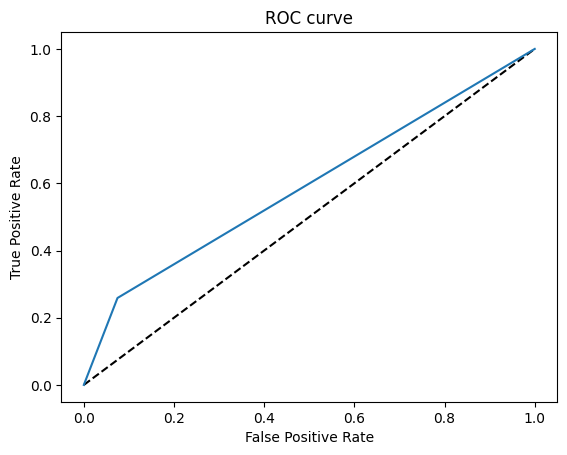

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(y_test, y_pred_probs)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

- If the curve is perfectly on the dotted line, then ,model is perfectly predicting.
- If above, model is good.
- If down, model is not good.

To quantify the ROC curve we use AUC(Area Under Curve) Score.


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
auc_score= roc_auc_score(y_test,y_pred_probs)
confusion_matrix(y_test,y_pred)
classification_report(y_test,y_pred)
print(auc_score)

0.5920310727778639


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hyperparameter Tuning**

- Hyperparameters are the values that we need to specify before fitting the model.
- i.e. Ridge/Lasso : alpha, KNN: n_neighbors
- We use cross validation method to avoid the overfitting in the test set.

How to choose correct hyperparameter?


1.   Try lots of values
2.   Fit all of the values separately.
3.   See how they perform.
4.   Choose the best value.

Types of Hyperparameter tuning:


1.   Grid Search CV:
      - In this, we pass grid of different parameter values and every combinations is tried out.
2.   Randomized Search CV:
      - only specific numbers of sample combinations are tried out.




In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

#estimator
kf = KFold(n_splits=5, shuffle=True, random_state= 42)

#grid of hyperparameter values
paramgrid= {"alpha":np.linspace(0.00001,1,20),
            "solver":["sag","lsqr"]}

#for ridge regression model
ridge= Ridge()

ridge_cv= GridSearchCV(ridge, paramgrid, cv=kf)

ridge_cv.fit(X_train,y_train)

print(ridge_cv.best_params_,ridge_cv.best_score_)


{'alpha': 0.5789515789473684, 'solver': 'sag'} 0.07717667419488564


In [ ]:
from sklearn.linear_model import Lasso

param_grid= {"alpha":np.linspace(0.00001,1,20)}
lasso= Lasso()
lasso_cv= GridSearchCV(lasso,param_grid,cv=kf)
lasso_cv.fit(X_train,y_train)
print(lasso_cv.best_params_,lasso_cv.best_score_)

{'alpha': 1e-05} 0.07709467944746891


In [ ]:
#predict on test set
print(ridge_cv.score(X_test,y_test))

0.03989168968269241


In [ ]:
print(lasso_cv.score(X_test,y_test))

0.03977990779142038


In [ ]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

kf= KFold(n_splits=5,shuffle= True, random_state= 42)

params={"penalty":['l1', 'l2'],
        'C': [1 , 0.5, 0.1, 0.05, 0.01]}

logreg= LogisticRegression()
logreg_cv= RandomizedSearchCV(logreg,params, cv=kf, n_iter= 2)
logreg_cv.fit(X_train,y_train)
print(logreg_cv.best_params_,logreg_cv.best_score_)

{'penalty': 'l2', 'C': 0.05} 0.8542573820661514


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [ ]:
print(logreg_cv.score(X_test,y_test))

0.857
